In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('/content/india_earthquakes.csv')

df = df.dropna()

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

X = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError',
        'depthError', 'magError', 'year', 'month', 'day', 'hour', 'minute', 'second']]

y = df['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)
1

best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Mean Squared Error: 0.040169665756828836
R-squared: 0.7308729172584979


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/india_earthquakes.csv')

df = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'magNst', 'mag']].dropna()

X = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'magNst']]
y = df['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Mean Squared Error: 0.03842968988873202
Root Mean Squared Error: 0.19603492007479692
Mean Absolute Error: 0.14504909058152202
R-squared: 0.7425303363731168


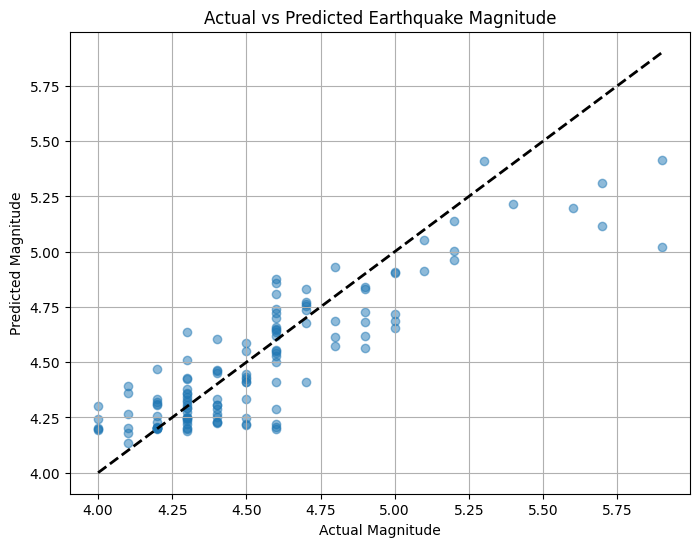

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Earthquake Magnitude')
plt.grid(True)
plt.show()

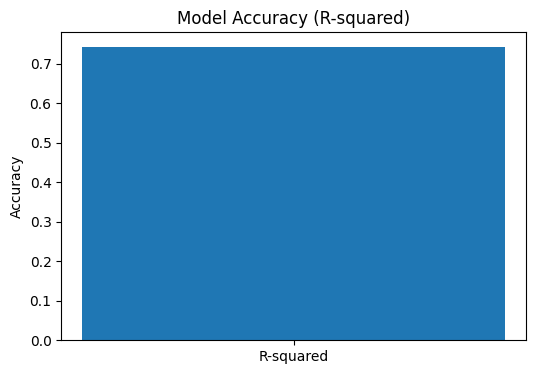

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['R-squared'], [r2])
plt.ylabel('Accuracy')
plt.title('Model Accuracy (R-squared)')
plt.show()

In [ ]:
#@title Input Earthquake Data
latitude = 19.0911 #@param {type:"number"}
longitude = 72.5235 #@param {type:"number"}
depth = 10 #@param {type:"number"}
nst = 70 #@param {type:"number"}
gap = 65 #@param {type:"number"}
dmin = 4.14 #@param {type:"number"}
rms = 0.8 #@param {type:"number"}
magNst = 5.2 #@param {type:"number"}

new_data = [[latitude, longitude, depth, nst, gap, dmin, rms, magNst]]
predicted_magnitude = best_model.predict(new_data)
print(f"Predicted Earthquake Magnitude (Random Forest): {predicted_magnitude[0]}")

Predicted Earthquake Magnitude (Random Forest): 4.980825371592628


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
